In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv("Housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
x = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [9]:
x 
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data 
''' Data trained '''

' Data trained '

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

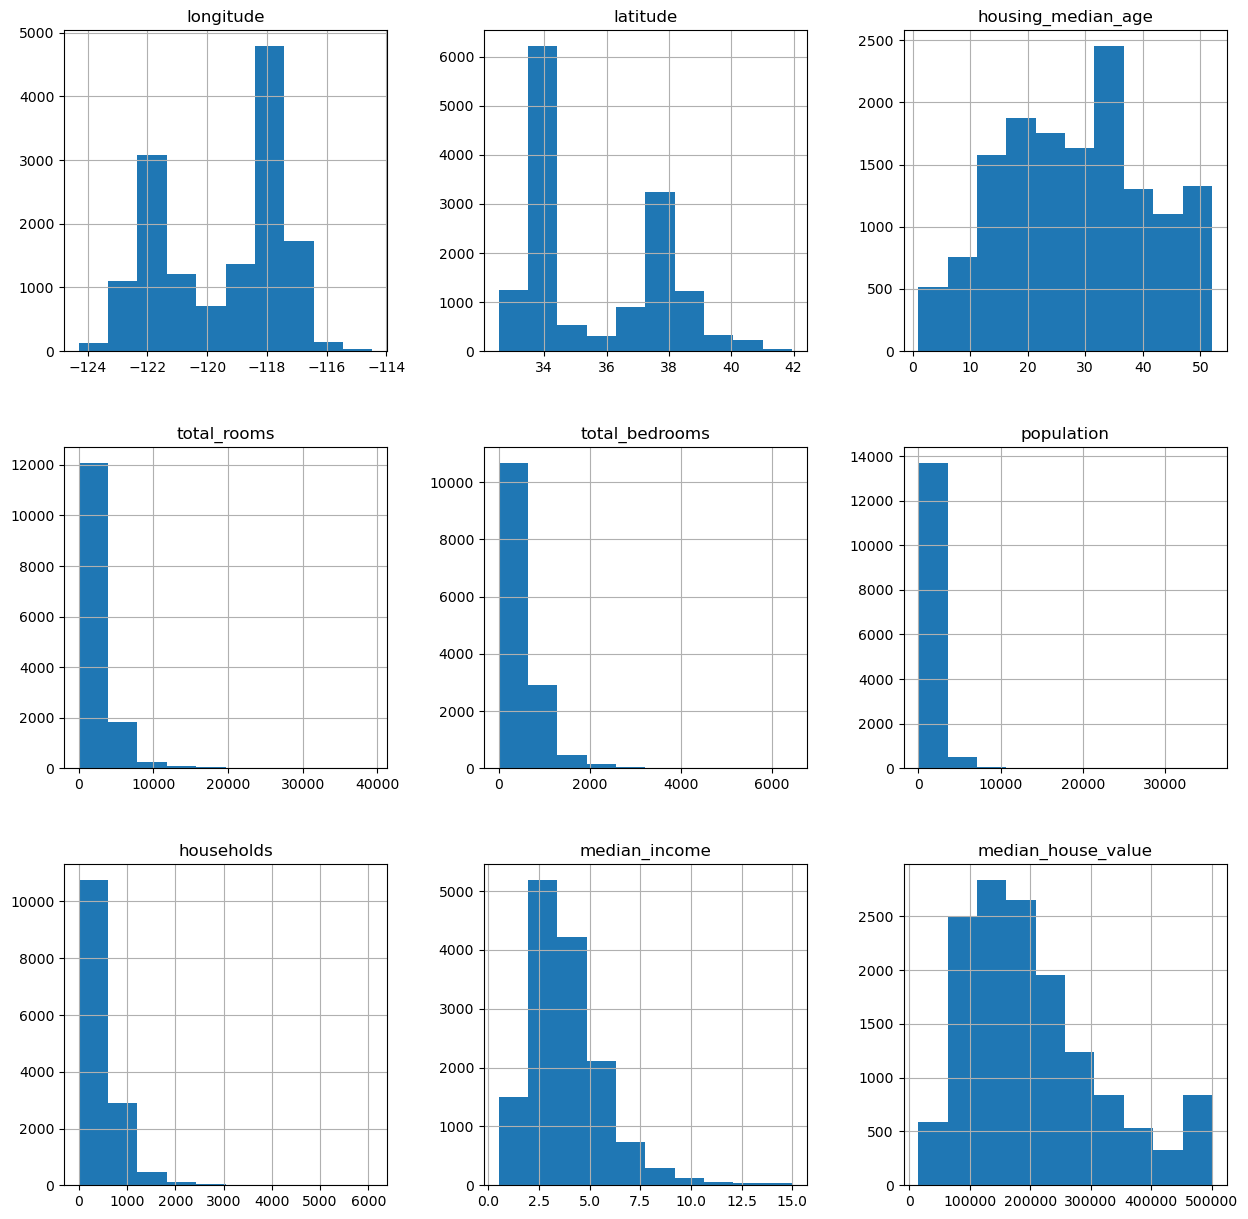

In [13]:
train_data.hist(figsize=(15,15))

In [14]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925631,-0.103189,0.042468,0.067711,0.095615,0.054539,-0.017588,-0.048637
latitude,-0.925631,1.000000,0.007666,-0.035981,-0.068232,-0.104903,-0.072086,-0.075121,-0.141035
housing_median_age,-0.103189,0.007666,1.000000,-0.361224,-0.321936,-0.294975,-0.305020,-0.129361,0.101101
total_rooms,0.042468,-0.035981,-0.361224,1.000000,0.931814,0.855450,0.920814,0.196393,0.130755
total_bedrooms,0.067711,-0.068232,-0.321936,0.931814,1.000000,0.873514,0.979957,-0.005919,0.050010
population,0.095615,-0.104903,-0.294975,0.855450,0.873514,1.000000,0.902643,0.006315,-0.025065
households,0.054539,-0.072086,-0.305020,0.920814,0.979957,0.902643,1.000000,0.014607,0.064902
median_income,-0.017588,-0.075121,-0.129361,0.196393,-0.005919,0.006315,0.014607,1.000000,0.685376
median_house_value,-0.048637,-0.141035,0.101101,0.130755,0.050010,-0.025065,0.064902,0.685376,1.000000


<AxesSubplot:>

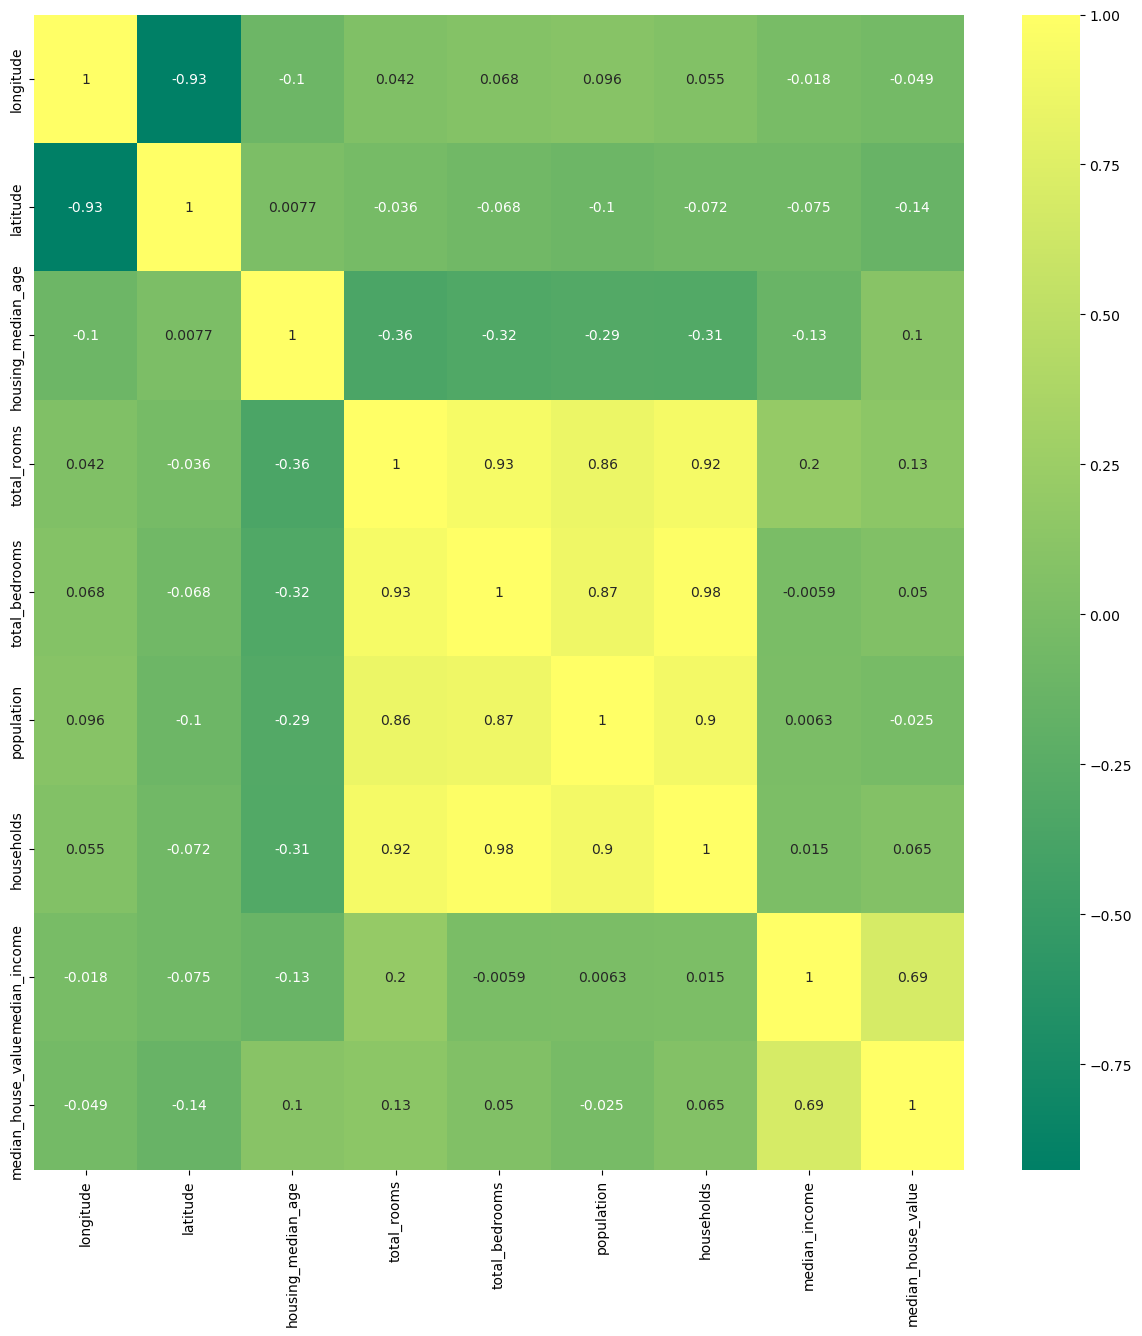

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(), annot=True, cmap="summer")

In [16]:
train_data['total_rooms']= np.log(train_data['total_rooms'] + 1) 
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] + 1) 
train_data['population']= np.log(train_data['population'] + 1) 
train_data['households']= np.log(train_data['households'] + 1) 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

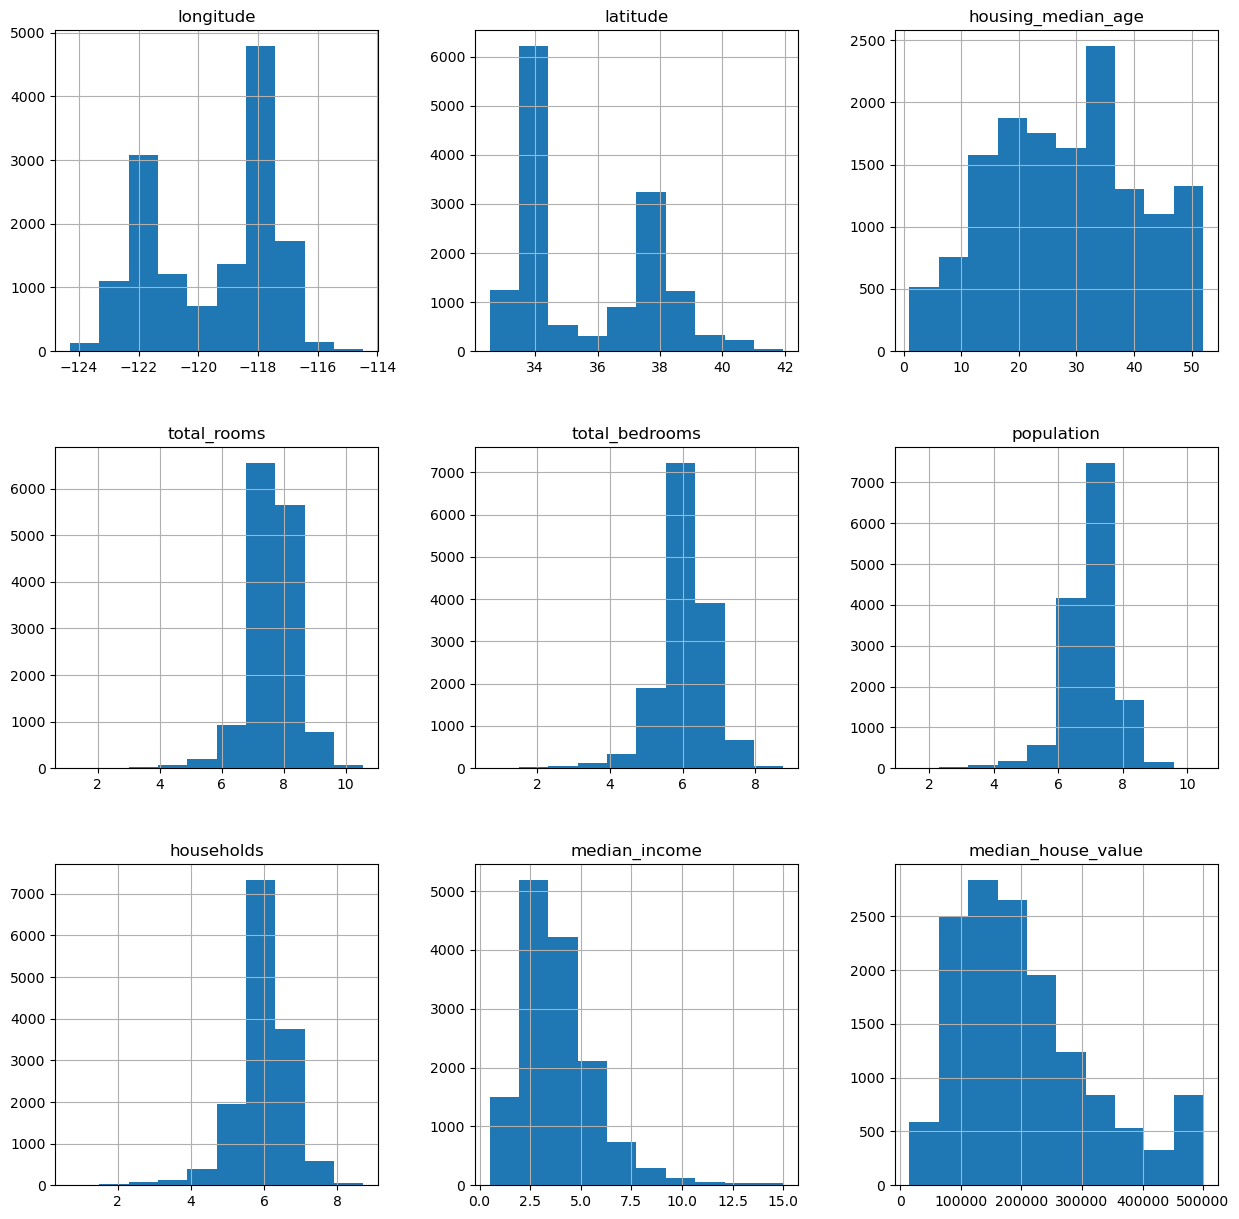

In [17]:
train_data.hist(figsize=(15,15))

In [18]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     6309
INLAND        4575
NEAR OCEAN    1846
NEAR BAY      1571
ISLAND           2
Name: ocean_proximity, dtype: int64

In [19]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10996,-117.83,33.74,23.0,8.718500,7.392648,8.316056,7.327781,3.0382,183600.0,1,0,0,0,0
13074,-121.28,38.59,3.0,8.340217,7.036148,7.641084,6.903747,3.0481,92500.0,0,1,0,0,0
3610,-118.42,34.24,36.0,7.074963,5.398163,6.654153,5.389072,4.7228,183800.0,1,0,0,0,0
13317,-117.64,34.07,30.0,7.933080,6.570883,7.881560,6.542472,2.2765,98100.0,0,1,0,0,0
5446,-118.44,34.00,41.0,7.354362,5.934894,6.774224,5.910797,4.1083,324300.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17265,-119.73,34.35,20.0,7.407924,5.768321,6.809039,5.730100,4.3750,335200.0,0,0,0,0,1
5999,-117.75,34.08,33.0,7.946264,6.261492,7.494430,6.202536,3.6359,135100.0,0,1,0,0,0
18021,-121.96,37.24,26.0,8.017308,6.406880,7.097549,6.333280,5.4683,430900.0,1,0,0,0,0
13884,-116.72,34.89,14.0,8.418036,6.775366,7.403061,6.381816,2.8594,81700.0,0,1,0,0,0


<AxesSubplot:>

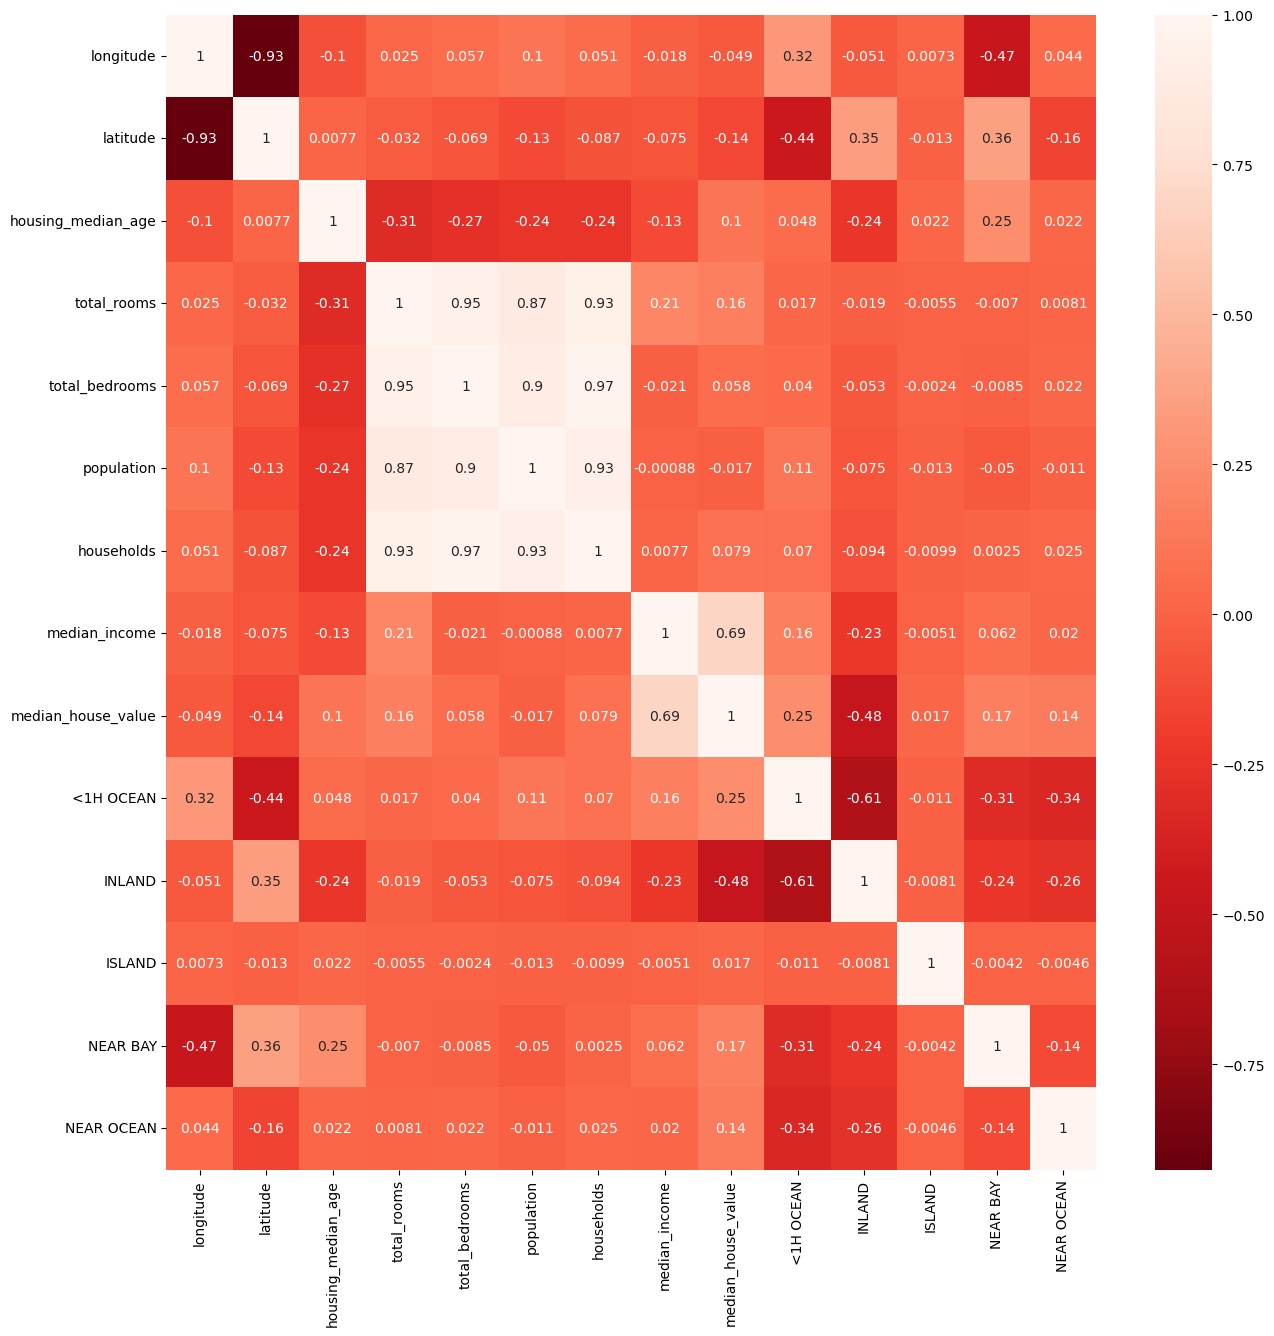

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(), annot=True, cmap="Reds_r")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

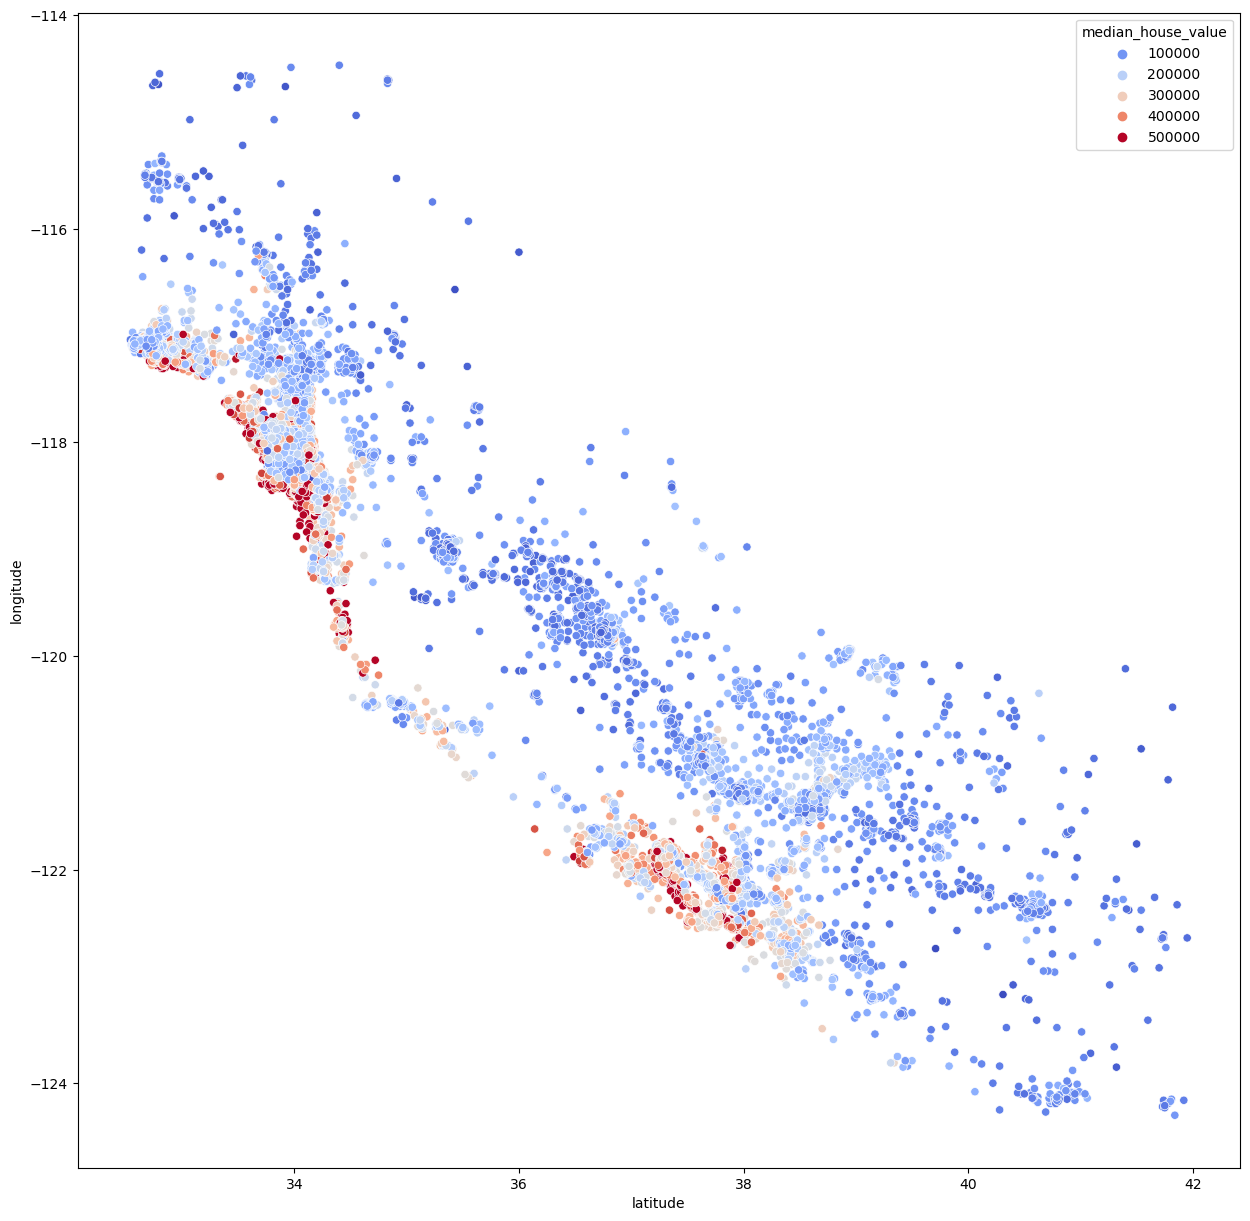

In [22]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")


In [23]:
train_data['bedroom_ratio']=train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms'] / train_data['households']

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
10996,-117.83,33.74,23.0,8.718500,7.392648,8.316056,7.327781,3.0382,183600.0,1,0,0,0,0,0.847927,1.189787
13074,-121.28,38.59,3.0,8.340217,7.036148,7.641084,6.903747,3.0481,92500.0,0,1,0,0,0,0.843641,1.208071
3610,-118.42,34.24,36.0,7.074963,5.398163,6.654153,5.389072,4.7228,183800.0,1,0,0,0,0,0.762995,1.312835
13317,-117.64,34.07,30.0,7.933080,6.570883,7.881560,6.542472,2.2765,98100.0,0,1,0,0,0,0.828289,1.212551
5446,-118.44,34.00,41.0,7.354362,5.934894,6.774224,5.910797,4.1083,324300.0,1,0,0,0,0,0.806990,1.244225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17265,-119.73,34.35,20.0,7.407924,5.768321,6.809039,5.730100,4.3750,335200.0,0,0,0,0,1,0.778669,1.292809
5999,-117.75,34.08,33.0,7.946264,6.261492,7.494430,6.202536,3.6359,135100.0,0,1,0,0,0,0.787979,1.281132
18021,-121.96,37.24,26.0,8.017308,6.406880,7.097549,6.333280,5.4683,430900.0,1,0,0,0,0,0.799131,1.265901
13884,-116.72,34.89,14.0,8.418036,6.775366,7.403061,6.381816,2.8594,81700.0,0,1,0,0,0,0.804863,1.319066


In [30]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

In [33]:
test_data=X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)

test_data[ 'total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)

test_data['population'] = np.log(test_data['population']+ 1)

test_data[ 'households'] = np.log(test_data['households'] + 1)

test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] /  test_data['total_rooms']

test_data[ 'household rooms'] = test_data['total_rooms'] /  test_data['households']

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']




In [34]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household rooms
1496,-122.01,37.94,18.0,7.639161,5.700444,6.843750,5.680173,6.3809,273600.0,0,0,0,1,0,0.746213,1.344882
9478,-123.36,39.41,46.0,7.466799,5.894403,6.695799,5.802118,2.9183,76900.0,1,0,0,0,0,0.789415,1.286909
12199,-117.19,33.64,12.0,7.301148,5.583496,6.630683,5.497168,3.2350,210700.0,1,0,0,0,0,0.764742,1.328165
14106,-117.10,32.75,23.0,7.527794,6.313548,7.317876,6.200509,1.7446,85200.0,0,0,0,0,1,0.838698,1.214061
12529,-121.49,38.57,51.0,7.308543,5.955837,6.602588,5.902633,1.7155,108800.0,0,1,0,0,0,0.814914,1.238183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-122.29,37.81,46.0,6.841615,5.697093,6.368187,5.627621,0.7286,95200.0,0,0,0,1,0,0.832712,1.215721
3626,-118.43,34.24,35.0,7.305860,5.683580,7.014814,5.666427,4.4688,182500.0,1,0,0,0,0,0.777948,1.289324
12682,-121.40,38.55,26.0,7.900266,5.988961,6.993015,5.966147,5.0000,142500.0,0,1,0,0,0,0.758071,1.324182
2309,-119.74,36.83,14.0,8.450198,6.721426,7.712444,6.669498,4.1098,108200.0,0,1,0,0,0,0.795416,1.266992
